In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Чтение и предварительный обзор данных**

In [3]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(1503424, 18)

In [5]:
data.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503424 entries, 0 to 1503423
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   item_id               1503424 non-null  object 
 1   user_id               1503424 non-null  object 
 2   region                1503424 non-null  object 
 3   city                  1503424 non-null  object 
 4   parent_category_name  1503424 non-null  object 
 5   category_name         1503424 non-null  object 
 6   param_1               1441848 non-null  object 
 7   param_2               848882 non-null   object 
 8   param_3               640859 non-null   object 
 9   title                 1503424 non-null  object 
 10  description           1387148 non-null  object 
 11  price                 1418062 non-null  float64
 12  item_seq_number       1503424 non-null  int64  
 13  activation_date       1503424 non-null  object 
 14  user_type             1503424 non-

**Анализ пропусков**

In [8]:
is_nan = data.isna().sum() / len(data) * 100
print("NaN values in train Dataset")
print(is_nan[is_nan > 0].sort_values(ascending=False))

NaN values in train Dataset
param_3        57.373369
param_2        43.536753
description     7.734079
image           7.488772
image_top_1     7.488772
price           5.677839
param_1         4.095718
dtype: float64


Наибольшее количество пропусков наблюдается в столбцах param_3 (57.4%), param_2 (43.5%) и description (7.7%). Это значит, что значительная часть записей не содержит дополнительных параметров и описаний, что может затруднить анализ и предсказания модели. Столбец price также имеет 5.7% пропусков, что требует особого внимания при обработке данных.

**Исследование уникальных значений**

C:\Users\Настя\AppData\Local\Temp\ipykernel_15636\3895238445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cols, y=uniques, palette='hls', log=True)
C:\Users\Настя\AppData\Local\Temp\ipykernel_15636\3895238445.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


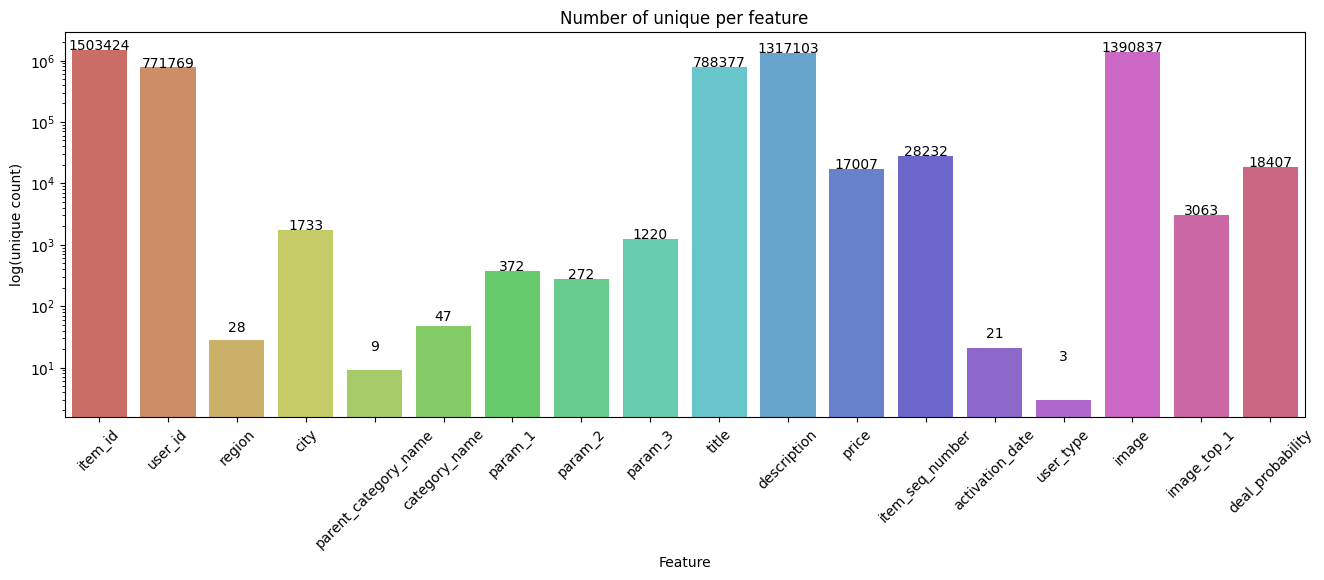

In [10]:
import seaborn as sns


plt.figure(figsize=(16, 5))

cols = data.columns
uniques = [len(data[col].unique()) for col in cols]

ax = sns.barplot(x=cols, y=uniques, palette='hls', log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique per feature')


for p, uniq in zip(ax.patches, uniques):
    ax.text(p.get_x() + p.get_width()/2.,
            uniq + 10,
            uniq,
            ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**Исследование ключевых признаков**

 Количество уникальных городов и регионов

In [12]:
cities = data['city'].nunique()
regions = data['region'].nunique()
print('Number of unique cities:', cities)
print('Number of unique regions:', regions)


Number of unique cities: 1733
Number of unique regions: 28


In [183]:
# Создаем числовой код для региона (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['region_encoded'] = label_encoder.fit_transform(data['region'])

# Расчет корреляции между закодированным регионом и вероятностью сделки
corr_region = data[['region_encoded', 'deal_probability']].corr().iloc[0, 1]
print(f"Корреляция между регионом и вероятностью сделки: {corr_region:.4f}")


Корреляция между регионом и вероятностью сделки: -0.0051


Практически нулевая отрицательная корреляция указывает на то, что регион не оказывает существенного влияния на вероятность сделки.

Распределение по основным категориям

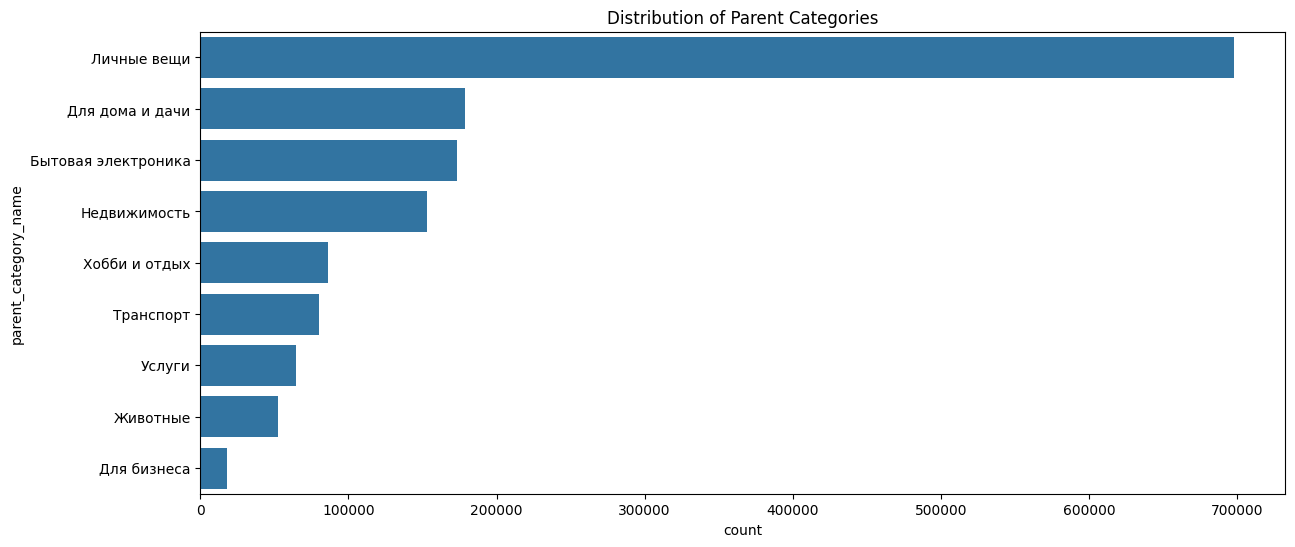

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(y='parent_category_name', data=data, order=data['parent_category_name'].value_counts().index)
plt.title("Distribution of Parent Categories")
plt.show()


 Количество уникальных городов - 1733, а регионов - 28, что указывает на широкую географию предложений. Распределение по основным категориям показывает, что наибольшее количество объявлений представлено в категориях личных вещей, товаров для дома и транспорта.

**Анализ цен**

Анализируем распределение цен для выявления трендов, а также применяем логарифмическое преобразование для уменьшения перекоса данных.

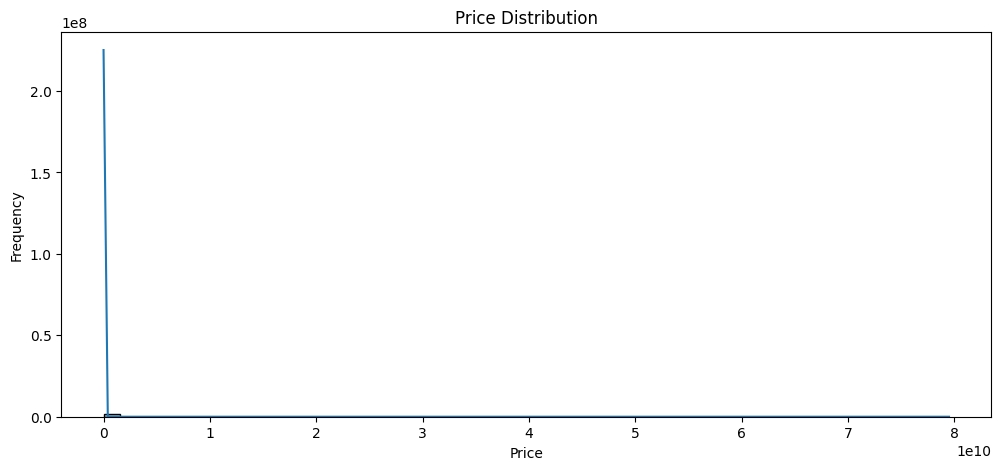

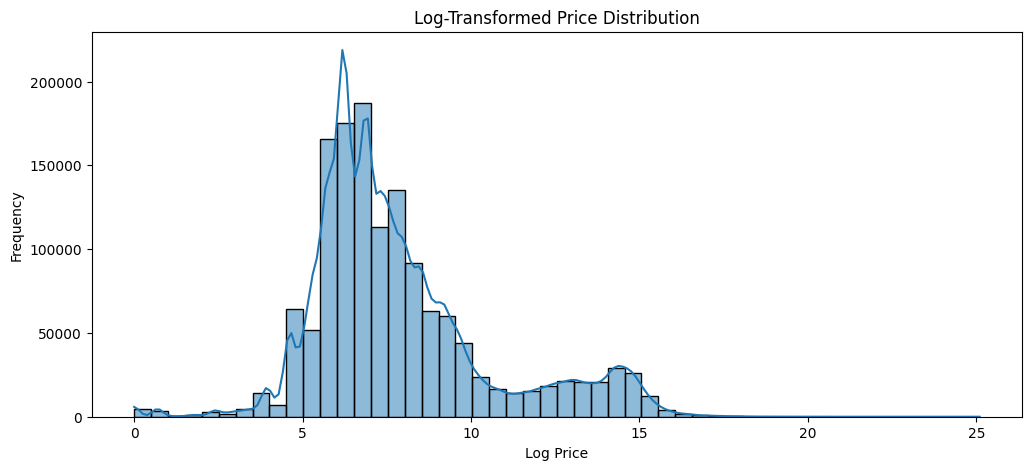

In [ ]:

plt.figure(figsize=(12, 5))
sns.histplot(data['price'].dropna(), bins=50, kde=True) 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


data['price_log'] = np.log1p(data['price'])  
plt.figure(figsize=(12, 5))
sns.histplot(data['price_log'].dropna(), bins=50, kde=True)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Log-Transformed Price Distribution')
plt.show()


Распределение цен имеет сильный перекос (большое количество товаров с низкой ценой), что подтверждается высокими значениями стандартного отклонения. Логарифмическое преобразование цен помогло уменьшить перекос, что позволит более точно анализировать данные и строить модели.

Analyze outliers

In [15]:
data['price'].describe()


count    1.418062e+06
mean     3.167081e+05
std      6.689154e+07
min      0.000000e+00
25%      5.000000e+02
50%      1.300000e+03
75%      7.000000e+03
max      7.950101e+10
Name: price, dtype: float64

**Временной анализ**

Преобразование даты активации в datetime формат

In [16]:
data['activation_date'] = pd.to_datetime(data['activation_date'])


График количества объявлений по датам

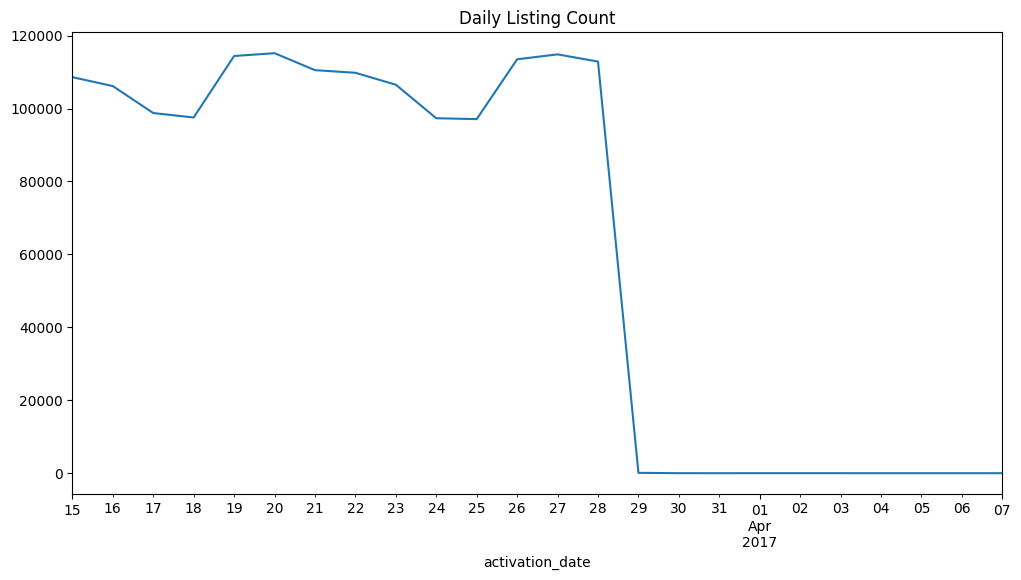

In [17]:
data.set_index('activation_date')['item_id'].resample('D').count().plot(title="Daily Listing Count", figsize=(12, 6))
plt.show()


**Анализ типа пользователя и вероятности сделки**

Распределение типов пользователей

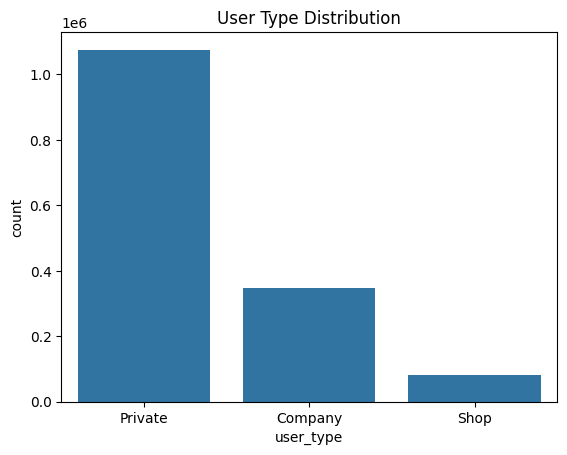

In [18]:
sns.countplot(x='user_type', data=data)
plt.title("User Type Distribution")
plt.show()


In [184]:
# Преобразуем тип пользователя в числовой (Company = 1, Private = 0)
data['user_type_encoded'] = data['user_type'].apply(lambda x: 1 if x == 'Company' else 0)

# Расчет корреляции между типом пользователя и вероятностью сделки
corr_user_type = data[['user_type_encoded', 'deal_probability']].corr().iloc[0, 1]
print(f"Корреляция между типом пользователя и вероятностью сделки: {corr_user_type:.4f}")


Корреляция между типом пользователя и вероятностью сделки: -0.0308


Небольшая отрицательная корреляция указывает на то, что объявления от компаний имеют чуть меньшую вероятность сделки по сравнению с частными продавцами. Это может быть связано с тем, что пользователи Avito более склонны доверять частным продавцам, считая их предложения менее коммерческими и более выгодными.

Вероятность сделки по типу пользователя

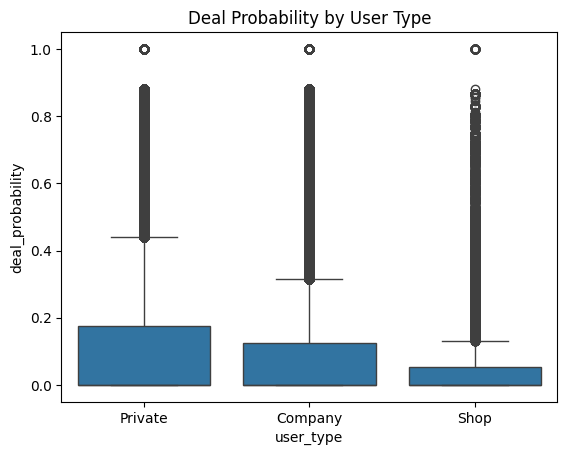

In [27]:
sns.boxplot(x='user_type', y='deal_probability', data=data)
plt.title("Deal Probability by User Type")
plt.show()


Типы пользователей (частные лица и компании) различаются по вероятности заключения сделки. Объявления от компаний имеют более высокую вероятность сделки, что может быть связано с более высоким качеством предложений или профессиональным подходом к продаже.

**Текстовый анализ описаний и заголовков**

Вычисление длины заголовков и описаний

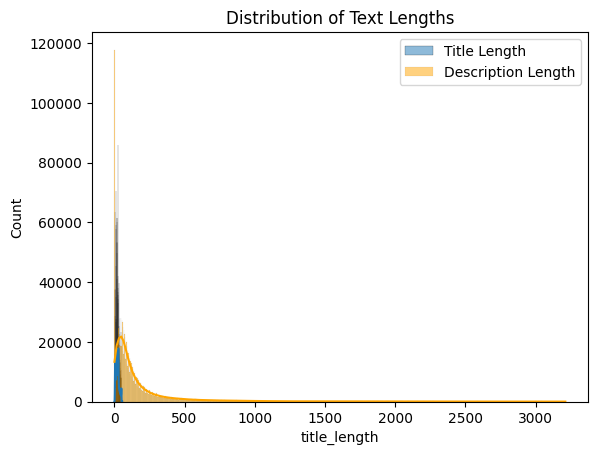

In [46]:
data['title_length'] = data['title'].apply(lambda x: len(str(x)))
data['description_length'] = data['description'].apply(lambda x: len(str(x)))
sns.histplot(data['title_length'], kde=True, label='Title Length')
sns.histplot(data['description_length'], kde=True, color="orange", label='Description Length')
plt.legend()
plt.title("Distribution of Text Lengths")
plt.show()

In [ ]:

data['title_length'] = data['title'].apply(lambda x: len(str(x)))
data['description_length'] = data['description'].apply(lambda x: len(str(x)))


corr_title = data[['title_length', 'deal_probability']].corr().iloc[0, 1]
print(f"Корреляция между длиной заголовка и вероятностью сделки: {corr_title:.4f}")


corr_description = data[['description_length', 'deal_probability']].corr().iloc[0, 1]
print(f"Корреляция между длиной описания и вероятностью сделки: {corr_description:.4f}")


Корреляция между длиной заголовка и вероятностью сделки: 0.0145
Корреляция между длиной описания и вероятностью сделки: 0.0021


Низкая корреляция: увеличенная длина заголовков и описаний сама по себе не является значимым фактором, влияющим на успешность продажи. Вероятно, важнее содержимое текста, его информативность и релевантность, чем его длина.

**Вероятность сделки по дням недели**

In [5]:
data["activation_date"] = pd.to_datetime(data["activation_date"])

In [6]:
deal_rate = data.groupby("activation_date").agg({"deal_probability": ["mean", "count"]}).sort_index()
deal_rate

deal_probability        
                            mean   count
activation_date                         
2017-03-15              0.140073  108615
2017-03-16              0.141151  106168
2017-03-17              0.141158   98773
2017-03-18              0.140338   97554
2017-03-19              0.137609  114416
2017-03-20              0.137785  115190
2017-03-21              0.138985  110535
2017-03-22              0.138858  109813
2017-03-23              0.137318  106544
2017-03-24              0.139919   97351
2017-03-25              0.141355   97104
2017-03-26              0.138612  113513
2017-03-27              0.136219  114863
2017-03-28              0.138975  112885
2017-03-29              0.696854      87
2017-03-30              0.000000       3
2017-03-31              0.000000       1
2017-04-01              0.803230       3
2017-04-02              0.255953       3
2017-04-03              0.368800       2
2017-04-07              0.737600       1

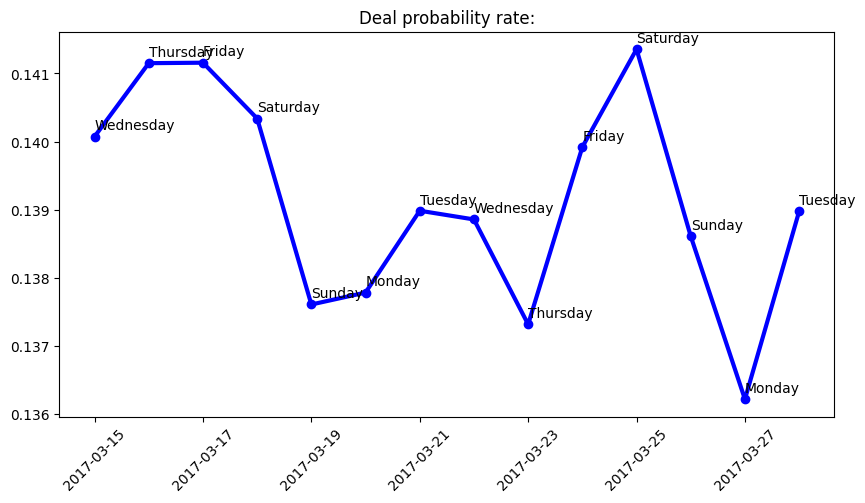

In [7]:
date_mask = deal_rate["deal_probability"].index < pd.Timestamp("2017-03-29")
plt.figure(figsize=(10, 5))
plt.title("Deal probability rate:")

index = deal_rate["deal_probability"][date_mask].index
values = deal_rate["deal_probability"][date_mask]["mean"].values 
plt.plot(index, values, marker="o", lw=3, color="blue")
for i, (x, y) in enumerate(zip(index, values)):
    plt.annotate(x.day_name(), (x, y+1e-4))

plt.xticks(rotation=45)
plt.show()

Можно отметить, что в пятницуи субботу вероятность сделки выше.

**Вероятность целевого события**

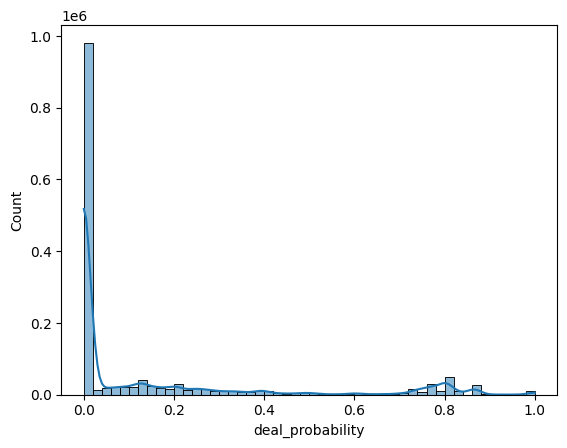

In [9]:
sns.histplot(data["deal_probability"], kde=True, bins=50, ec="k")
plt.show()

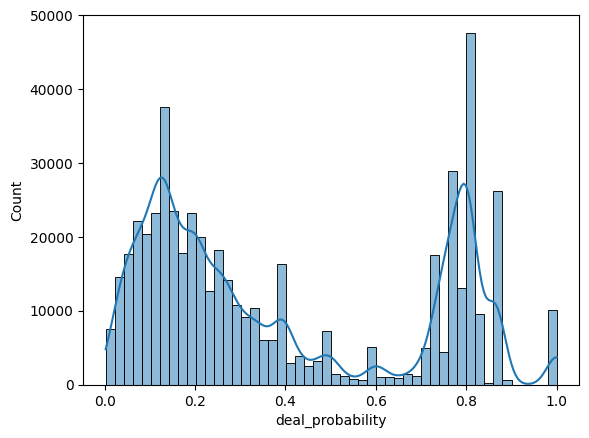

In [10]:
sns.histplot(data[data["deal_probability"] > 0]["deal_probability"], kde=True, bins=50, ec="k")
plt.show()

**Вероятность сделки в зависимости от области**

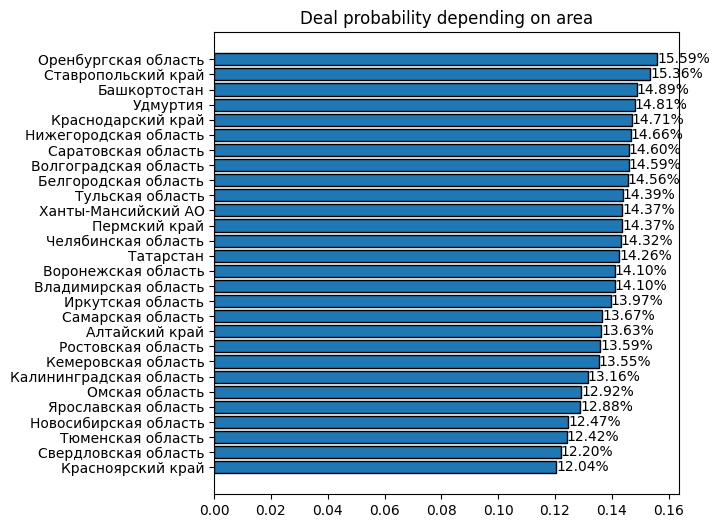

In [11]:
column = "deal_probability"

plt.figure(figsize=(6, 6))
stats = data.groupby(["region"]).agg({column: "mean"}).sort_values(column)
bars = plt.barh(stats.index, stats[column].values, ec="k")
plt.title("Deal probability depending on area")
plt.bar_label(bars, ["{:.2f}%".format(i*100) for i in bars.datavalues])
plt.show()